<div style="background-color: #e6e6fa; padding: 10px;">
    <h1>Introduction</h1>
</div>

This notebook embarks on a comprehensive exploration of the multifaceted relationship between alcohol consumption and various global factors, employing datasets that capture the essence of cultural, environmental, and religious influences on drinking patterns across countries. The analysis is structured into three distinct sections, each shedding light on a different dimension of alcohol consumption:

            
<strong>1. Alcohol Consumption vs. Country Analysis:</strong> Initially, the investigation delves into the patterns of alcohol consumption across different countries, utilizing a dataset that quantifies total alcohol consumption per capita. This section aims to identify the top and bottom countries in terms of alcohol consumption, offering a clear view of global drinking patterns and highlighting the diversity in alcohol consumption across nations.

            
<strong>2. Temperature vs. Alcohol Consumption Correlation:</strong> The analysis progresses by integrating a second dataset focused on global temperature records, facilitating a novel examination of the potential correlation between average temperature and alcohol consumption. This section explores the hypothesis that climatic conditions might influence drinking behavior, thereby contributing to the observed variations in alcohol consumption rates across different climatic zones.

            
<strong>3. Religion Percentage vs. Alcohol Consumption Correlation:</strong> The final section of the analysis introduces a third dataset, focusing on the adherence to religion across countries. This segment aims to uncover any existing correlations between the percentage of population adhering to various religions and their alcohol consumption habits. By examining the influence of religious demographics on drinking patterns, this analysis seeks to understand the complex interplay between cultural norms, religious beliefs, and alcohol consumption.

            
Through this structured approach, the notebook not only provides insights into the direct relationship between alcohol consumption and the selected variables but also opens avenues for deeper understanding of the societal, environmental, and cultural factors that influence drinking habits worldwide.

<div style="display: flex; justify-content: space-between; align-items: flex-start;">
    <div style="padding: 10px; width: 80%; text-align: right;">
        <img src="https://github.com/ocarhaci/images/blob/main/alcohol.jpg?raw=true" alt="Inflation trends" style="width: 100%; height: auto;">
    </div>
</div>

<div style="background-color: #e6e6fa; padding: 10px;">
    <h1>1. Alcohol Consumption vs. Country Analysis</h1>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML

df = pd.read_csv('/kaggle/input/alcohol-consumption/total-alcohol-consumption-per-capita-litres-of-pure- ahcool new.csv')
df.rename(columns={'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)': 'consumption'}, inplace=True)
df['consumption'] = pd.to_numeric(df['consumption'], errors='coerce')
df = df[df['consumption'] < 19] # Remove outliers. This dataset has some small number of outliers that pollutes the analysis, so that needs to be removed.
df = df.drop(columns=['Code', 'Year'])
averaged_df = df.groupby('Entity').mean()

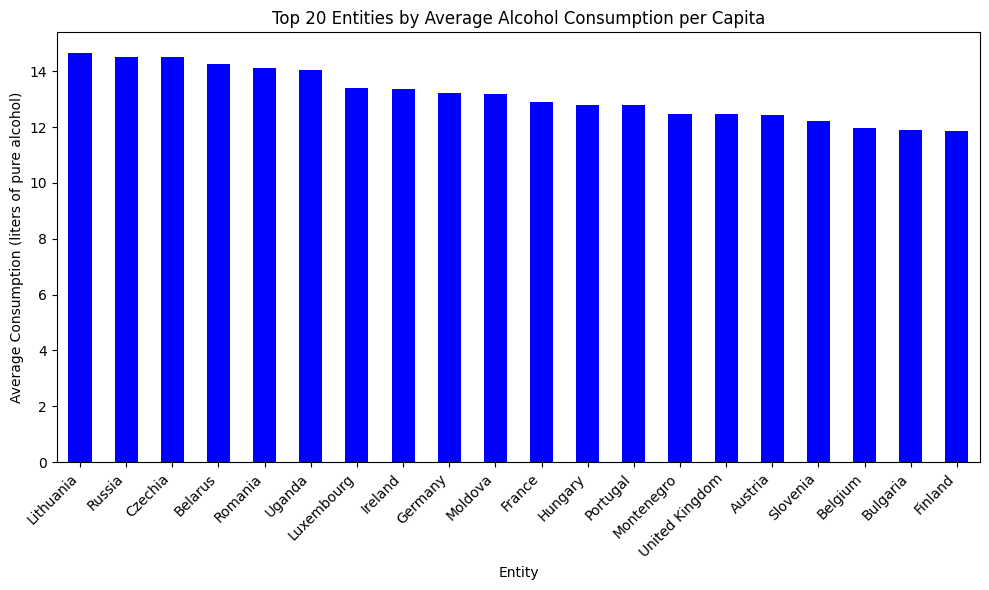

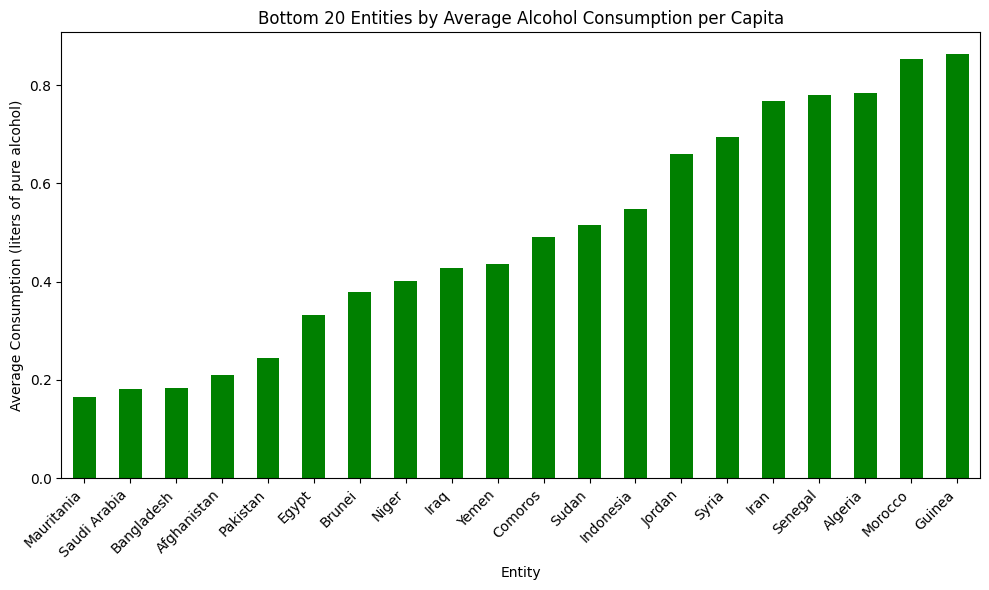

In [2]:
top_20 = averaged_df['consumption'].nlargest(20)
bottom_20 = averaged_df['consumption'].nsmallest(20)

# Plotting the top 20
plt.figure(figsize=(10, 6))
top_20.plot(kind='bar', color='blue')
plt.title('Top 20 Entities by Average Alcohol Consumption per Capita')
plt.xlabel('Entity')
plt.ylabel('Average Consumption (liters of pure alcohol)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plotting the bottom 20
plt.figure(figsize=(10, 6))
bottom_20.plot(kind='bar', color='green')
plt.title('Bottom 20 Entities by Average Alcohol Consumption per Capita')
plt.xlabel('Entity')
plt.ylabel('Average Consumption (liters of pure alcohol)')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


<div style="background-color: #e6e6fa; padding: 10px;">
    <h1>2. Temperature vs. Alcohol Consumption Correlation</h1>
</div>

In [3]:
df_temp = pd.read_csv('/kaggle/input/global-temperature-records-1850-2022/GlobalLandTemperatures_GlobalLandTemperaturesByMajorCity.csv')

df_temp = df_temp.drop(columns=['AverageTemperatureUncertainty', 'dt', 'City',  'Latitude',  'Longitude'])
df_temp_grouped = df_temp.groupby('Country').mean()
averaged_df = averaged_df.reset_index().rename(columns={'Entity': 'Country'})
merged_df = pd.merge(averaged_df, df_temp_grouped, on='Country', how='inner')
merged_df = merged_df.rename(columns={'Country': 'Entity/Country'})
merged_df = merged_df[['Entity/Country', 'AverageTemperature', 'consumption']]

In [4]:
merged_df.head(5)

,Entity/Country,AverageTemperature,consumption
0,Afghanistan,14.342919,0.210000
1,Angola,23.693046,6.142000
2,Australia,15.190055,11.506000
3,Bangladesh,25.490568,0.183333
4,Brazil,22.847555,8.174000


In [5]:
correlation = merged_df['AverageTemperature'].corr(merged_df['consumption'])
correlation

-0.5287982152210431


<div style="background-color: #e6e6fa; padding: 10px;">
    <h1>3. Religion Percentage vs. Alcohol Consumption Correlation</h1>
</div>

In [6]:
df_rel = pd.read_csv('/kaggle/input/global-adherence-to-religion-19452010/WRP national data.csv')
df_rel.head(3)

,year,state,name,chrstprot,chrstcat,chrstorth,chrstang,chrstothr,chrstgen,judorth,...,othrgenpct,sumreligpct,total,dualrelig,datatype,sourcereliab,recreliab,reliabilevel,Version,sourcecode
0,1945,2,USA,66069671,38716742,1121898,2400000,1956807,110265118,821489,...,0.0039,0.9961,1.0000,0,34,2,10,Medium,1.1,13
1,1950,2,USA,73090083,42635882,3045420,3045420,1177214,122994019,1078078,...,0.0041,0.9959,1.0000,0,34,6,28,Low,1.1,18
2,1955,2,USA,79294628,46402368,3454916,2572767,2277091,134001770,944000,...,0.0193,0.9807,0.9999,0,134,5,10,Medium,1.1,15


In [7]:
# We only need percentage data. So below, population data is removed.
df_rel = df_rel.drop(columns=['year', 'state',  'dualrelig',  'datatype','sourcereliab','recreliab','reliabilevel','Version','sourcecode','chrstprot', 'chrstcat', 'chrstorth', 'chrstang', 'chrstothr',
       'chrstgen', 'judorth', 'jdcons', 'judref', 'judothr', 'judgen', 'islmsun', 'islmshi', 'islmibd', 'islmnat', 'islmalw', 'islmahm', 'islmothr', 'islmgen', 'budmah', 'budthr', 'budothr', 'budgen',
       'zorogen', 'hindgen', 'sikhgen', 'shntgen', 'bahgen', 'taogen', 'jaingen', 'confgen', 'syncgen', 'anmgen', 'nonrelig', 'othrgen', 'sumrelig', 'pop' ])

# The dataset does not provide country names, but country codes. Below we have mappings from codes to names.
country_mapping = {
    'USA': 'United States of America', 'CAN': 'Canada', 'BHM': 'Bahamas', 'CUB': 'Cuba', 'HAI': 'Haiti', 'DOM': 'Dominican Republic', 'JAM': 'Jamaica','TRI': 'Trinidad and Tobago','BAR': 'Barbados','DMA': 'Dominica','GRN': 'Grenada',
    'SLU': 'Saint Lucia','SVG': 'Saint Vincent and the Grenadines','AAB': 'Antigua and Barbuda','SKN': 'Saint Kitts and Nevis','MEX': 'Mexico','BLZ': 'Belize','GUA': 'Guatemala','HON': 'Honduras','SAL': 'El Salvador',
    'NIC': 'Nicaragua','COS': 'Costa Rica','PAN': 'Panama','COL': 'Colombia','VEN': 'Venezuela','GUY': 'Guyana','SUR': 'Suriname','ECU': 'Ecuador','PER': 'Peru','BRA': 'Brazil','BOL': 'Bolivia','PAR': 'Paraguay',
    'CHL': 'Chile','ARG': 'Argentina','URU': 'Uruguay','UKG': 'United Kingdom','IRE': 'Ireland','NTH': 'Netherlands','BEL': 'Belgium','LUX': 'Luxembourg','FRN': 'France','MNC': 'Monaco','LIE': 'Liechtenstein','SWZ': 'Switzerland',
    'SPN': 'Spain','AND': 'Andorra','POR': 'Portugal','GMY': 'Germany','GFR': 'German Federal Republic','GDR': 'German Democratic Republic','POL': 'Poland','AUS': 'Australia','HUN': 'Hungary','CZE': 'Czech Republic','CZR': 'Czechoslovakia',
    'SLO': 'Slovakia','ITA': 'Italy','SNM': 'San Marino','MLT': 'Malta','ALB': 'Albania','MNG': 'Mongolia','MAC': 'Macedonia','CRO': 'Croatia','YUG': 'Yugoslavia','BOS': 'Bosnia and Herzegovina','KOS': 'Kosovo','SLV': 'Slovenia','GRC': 'Greece',
    'CYP': 'Cyprus','BUL': 'Bulgaria','MLD': 'Moldova','ROM': 'Romania','RUS': 'Russia','EST': 'Estonia','LAT': 'Latvia','LIT': 'Lithuania','UKR': 'Ukraine','BLR': 'Belarus','ARM': 'Armenia','GRG': 'Georgia','AZE': 'Azerbaijan',
    'FIN': 'Finland','SWD': 'Sweden','NOR': 'Norway','DEN': 'Denmark','ICE': 'Iceland','CAP': 'Cape Verde','STP': 'São Tomé and Príncipe','GNB': 'Guinea-Bissau','EQG': 'Equatorial Guinea','GAM': 'The Gambia',
    'MLI': 'Mali','SEN': 'Senegal','BEN': 'Benin','MAA': 'Mauritania','NIR': 'Niger','CDI': 'Côte d\'Ivoire','GUI': 'Guinea','BFO': 'Burkina Faso','LBR': 'Liberia','SIE': 'Sierra Leone','GHA': 'Ghana',
    'TOG': 'Togo','CAO': 'Cameroon','NIG': 'Nigeria','GAB': 'Gabon','CEN': 'Central African Republic','CHA': 'Chad','CON': 'Republic of the Congo','DRC': 'Democratic Republic of the Congo','UGA': 'Uganda',
    'KEN': 'Kenya','TAZ': 'Tanzania','BUI': 'Burundi','RWA': 'Rwanda','SOM': 'Somalia','DJI': 'Djibouti','ETH': 'Ethiopia','ERI': 'Eritrea','ANG': 'Angola','MZM': 'Mozambique','ZAM': 'Zambia','ZIM': 'Zimbabwe',
    'MAW': 'Malawi','SAF': 'South Africa','NAM': 'Namibia','LES': 'Lesotho','BOT': 'Botswana','SWA': 'Eswatini','MAG': 'Madagascar','COM': 'Comoros','MAS': 'Mauritius','SEY': 'Seychelles','MOR': 'Morocco',
    'ALG': 'Algeria','TUN': 'Tunisia','LIB': 'Libya','SUD': 'Sudan','IRN': 'Iran','TUR': 'Turkey','IRQ': 'Iraq','EGY': 'Egypt','SYR': 'Syria','LEB': 'Lebanon','JOR': 'Jordan','ISR': 'Israel','SAU': 'Saudi Arabia','YAR': 'North Yemen',
    'YEM': 'Yemen','YPR': 'South Yemen','KUW': 'Kuwait','BAH': 'Bahrain','QAT': 'Qatar','UAE': 'United Arab Emirates','OMA': 'Oman','AFG': 'Afghanistan','TKM': 'Turkmenistan','TAJ': 'Tajikistan','KYR': 'Kyrgyzstan',
    'UZB': 'Uzbekistan','KZK': 'Kazakhstan','CHN': 'China','MON': 'Mongolia','TAW': 'Taiwan','PRK': 'North Korea','ROK': 'South Korea','JPN': 'Japan','IND': 'India','BHU': 'Bhutan','PAK': 'Pakistan','BNG': 'Bangladesh',
    'MYA': 'Myanmar','SRI': 'Sri Lanka','MAD': 'Maldives','NEP': 'Nepal','THI': 'Thailand','CAM': 'Cambodia','LAO': 'Laos','DRV': 'North Vietnam','RVN': 'South Vietnam','MAL': 'Malaysia','SIN': 'Singapore','BRU': 'Brunei',
    'PHI': 'Philippines','INS': 'Indonesia','ETM': 'East Timor','AUL': 'Australia','PNG': 'Papua New Guinea','NEW': 'New Zealand','VAN': 'Vanuatu','SOL': 'Solomon Islands','KIR': 'Kiribati','TUV': 'Tuvalu','FIJ': 'Fiji',
    'TON': 'Tonga','NAU': 'Nauru','MSI': 'Marshall Islands','PAL': 'Palau','FSM': 'Federated States of Micronesia','WSM': 'Samoa'
}

In [8]:
df_rel['name'] = df_rel['name'].replace(country_mapping)
df_rel = df_rel.reset_index().rename(columns={'name': 'Country'})
merged_df = pd.merge(averaged_df, df_rel, on='Country', how='inner')
merged_df_grouped = merged_df.groupby('Country').mean()
merged_df_grouped = merged_df_grouped.drop(columns=['index', 'sumreligpct', 'total', 'islmnatpct']) # islmnatpct removed due to NaN values

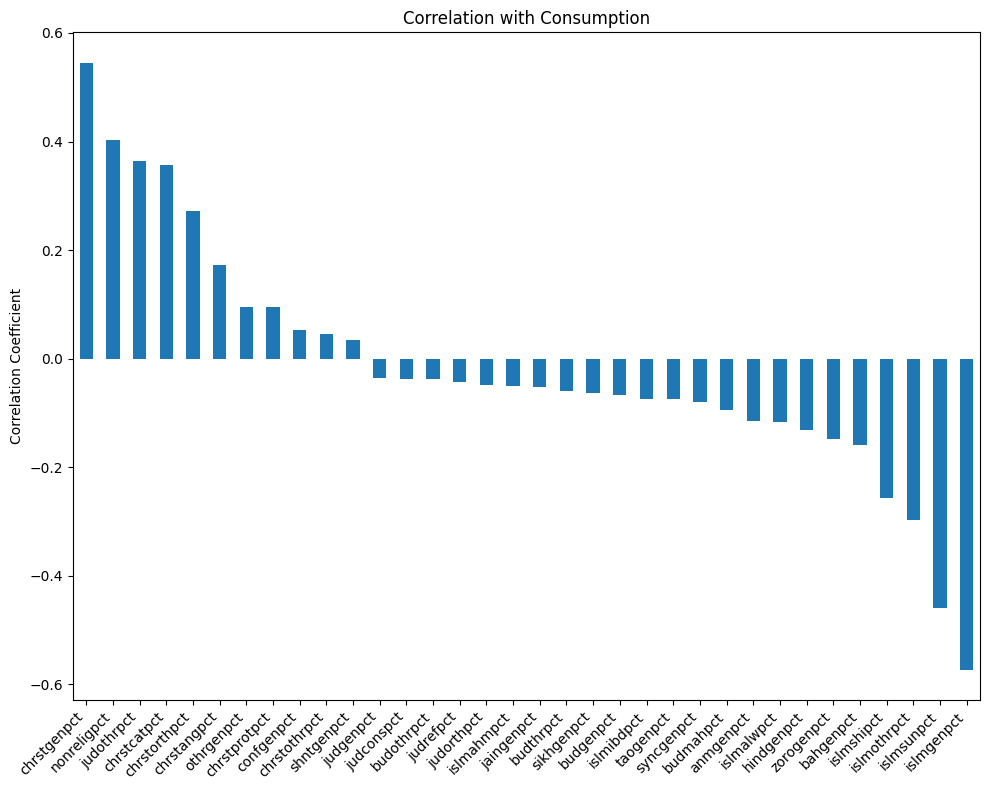

In [9]:
correlation_matrix = merged_df_grouped.corr()

# Extract the 'consumption' correlations
consumption_correlations = correlation_matrix['consumption']

consumption_correlations = consumption_correlations.drop('consumption', errors='ignore')

# Sort the correlations from highest to lowest
consumption_correlations_sorted = consumption_correlations.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
consumption_correlations_sorted.plot(kind='bar')
plt.title('Correlation with Consumption')
plt.xlabel('')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

In [10]:
# Summing up subparts for major religions
merged_df_grouped['christianity_pct'] = merged_df_grouped[['chrstprotpct', 'chrstcatpct', 'chrstorthpct', 'chrstangpct', 'chrstothrpct', 'chrstgenpct']].sum(axis=1)
merged_df_grouped['judaism_pct'] = merged_df_grouped[['judorthpct', 'judconspct', 'judrefpct', 'judothrpct', 'judgenpct']].sum(axis=1)
merged_df_grouped['islam_pct'] = merged_df_grouped[['islmsunpct', 'islmshipct', 'islmibdpct', 'islmalwpct', 'islmahmpct', 'islmothrpct', 'islmgenpct']].sum(axis=1)
merged_df_grouped['buddhism_pct'] = merged_df_grouped[['budmahpct', 'budthrpct', 'budothrpct', 'budgenpct']].sum(axis=1)
merged_df_grouped['hinduism_pct'] = merged_df_grouped[['hindgenpct']].sum(axis=1)
merged_df_grouped['non-religion_pct'] = merged_df_grouped[['nonreligpct']].sum(axis=1)

columns_to_drop = ['chrstprotpct', 'chrstcatpct', 'chrstorthpct', 'chrstangpct', 'chrstothrpct', 'chrstgenpct', 'judorthpct', 'judconspct', 'judrefpct', 'judothrpct', 'judgenpct',
                   'islmsunpct', 'islmshipct', 'islmibdpct', 'islmalwpct', 'islmahmpct', 'islmothrpct', 'islmgenpct','budmahpct', 'budthrpct', 'budothrpct', 'budgenpct',  'zorogenpct', 
                   'hindgenpct', 'sikhgenpct', 'shntgenpct', 'bahgenpct', 'taogenpct', 'jaingenpct', 'confgenpct', 'syncgenpct', 'anmgenpct', 'nonreligpct', 'othrgenpct' ]

merged_df_grouped = merged_df_grouped.drop(columns=columns_to_drop, errors='ignore')

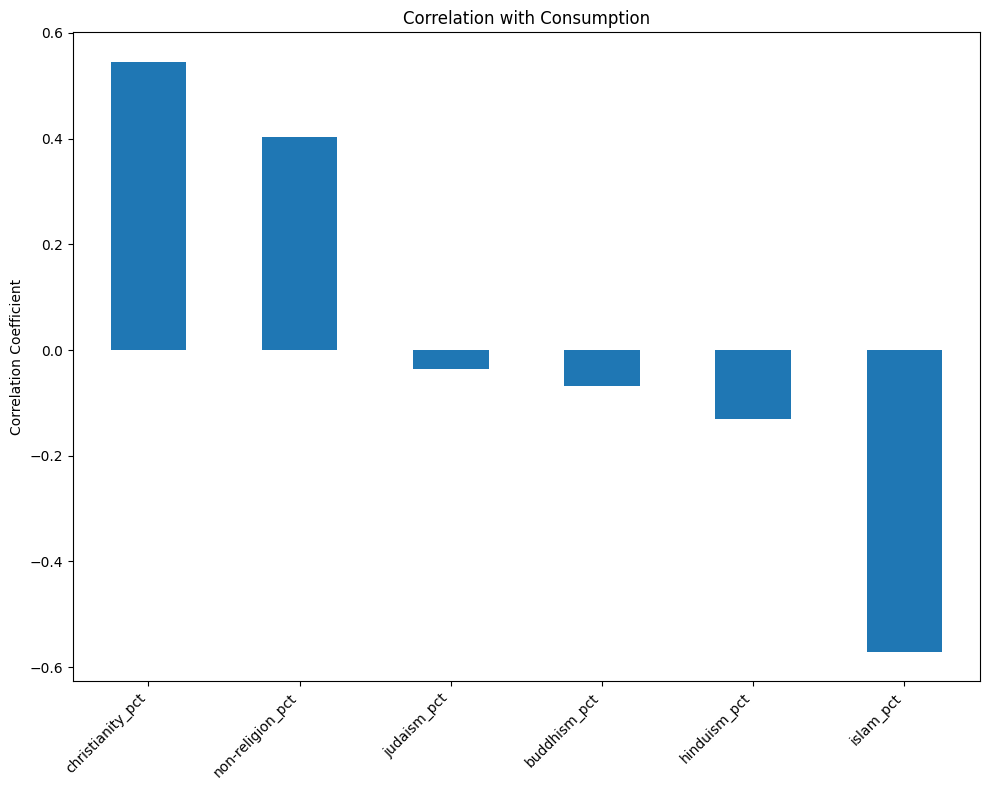

In [11]:
correlation_matrix = merged_df_grouped.corr()

# Extract the 'consumption' correlations
consumption_correlations = correlation_matrix['consumption']

consumption_correlations = consumption_correlations.drop('consumption', errors='ignore')

# Sort the correlations from highest to lowest
consumption_correlations_sorted = consumption_correlations.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
consumption_correlations_sorted.plot(kind='bar')
plt.title('Correlation with Consumption')
plt.xlabel('')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

<div style="background-color: #e6e6fa; padding: 10px;">
    <h1>Conclusion</h1>
</div>


This analytical journey through the intricate landscape of alcohol consumption, set against the backdrop of global diversity in countries, climate, and religious adherence, culminates in insightful revelations and patterns that underscore the complex interplay of various factors influencing drinking habits worldwide.

The initial examination revealed that <strong>Lithuania, Russia, Czechia, Belarus, and Romania</strong> stand out as the top consumers of alcohol per capita, showcasing a notable predilection towards higher alcohol intake. On the contrary, countries such as <strong>Mauritania, Saudi Arabia, Bangladesh, Afghanistan, and Pakistan</strong> emerged as the least consumers, highlighting cultural, religious, and possibly legal influences that significantly curb alcohol consumption.

A deeper dive into the correlation between average temperature and alcohol consumption unveiled a negative correlation coefficient of -0.52. This suggests a discernible pattern where countries with <strong>cooler climates tend to have higher alcohol consumption rates</strong>, possibly reflecting cultural, social, or physiological responses to colder environments.

Furthermore, the exploration into the correlation between religion and alcohol consumption brought to light that <strong>Christianity and non-religion</strong> are associated with <strong>stronger positive correlations</strong> (>0.4) with alcohol consumption. This indicates that countries with higher percentages of Christian or non-religious populations tend to consume more alcohol. In stark contrast, <strong>Islam</strong> exhibited a <strong>strong negative correlation</strong> ( < -0.5 ) with alcohol consumption, underscoring the profound impact of Islamic religious teachings and practices on reducing alcohol intake among its adherents.
 
These findings illuminate the significant role that cultural, environmental, and religious factors play in shaping alcohol consumption patterns across the globe. The stark contrasts between the top and bottom consumers, the inverse relationship between temperature and consumption, and the varied correlations with religious adherence all contribute to a nuanced understanding of global alcohol consumption dynamics. This analysis not only provides valuable insights into the factors influencing alcohol consumption but also opens up avenues for further research into the sociocultural, environmental, and religious complexities that govern drinking behaviors worldwide.


<div style="background-color: #d3d3d3; padding: 10px;">
    <h1>Thanks for reading</h1>
</div>
